In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
import glob
import util

# Util Demo

In [2]:
data_dir1 = "data/acquisitions/S1/G1"
data_dir2 = "data/acquisitions/S2/G1"

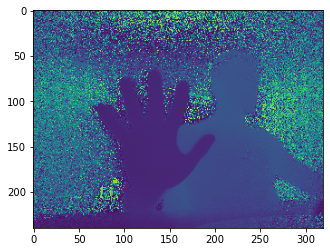

In [3]:
# Read form depth map
im = util.read_depth_map(data_dir1 + "/1-depth.bin")
plt.imshow(im)

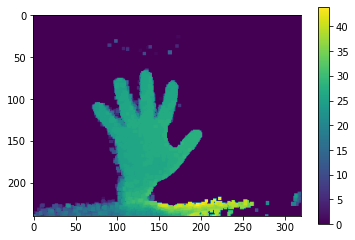

In [4]:
# Binarize
binary_im = util.binarize(im, display=True)

# Junk

In [ ]:
def binarize(im, threshold=50, kernel=np.ones((4,4)), display=False):
    im = im/im1.max() * 255
    im = im.astype(np.uint8)
    im[im > 50] = 0
    im = cv2.erode(im, kernel)
    im = cv2.dilate(im, kernel)
    
    if display is True:
        plt.imshow(im)
        plt.colorbar()
        plt.show()
    return im

In [ ]:
with open(data_dir1 + '/1-depth.bin', mode='rb') as f:
    im1 = np.fromfile(f,dtype=np.uint16,count=w*h).reshape(h,w)
binarize(im1, display=True)

In [ ]:
#
# First Image
#

w, h = 320, 240
with open(data_dir1 + '/1-depth.bin', mode='rb') as f:
    im1 = np.fromfile(f,dtype=np.uint16,count=w*h).reshape(h,w)
im1 = im1/im1.max() * 255
im1 = im1.astype(np.uint8)
im1[im1 > 50] = 0

kernel = np.ones((4,4))
im1 = cv2.erode(im1, kernel)
im1 = cv2.dilate(im1, kernel)

plt.imshow(im1)
plt.colorbar()
plt.show()

plt.hist(im1,bins = np.arange(0,255, 51)) 
plt.title("histogram") 
plt.show()

In [ ]:
#
# Second Image
#
w, h = 320, 240
with open(data_dir2 + '/1-depth.bin', mode='rb') as f:
    im1 = np.fromfile(f,dtype=np.uint16,count=w*h).reshape(h,w)
im1 = im1/im1.max() * 255
im1 = im1.astype(np.uint8)
im1[im1 > 50] = 0

kernel = np.ones((4,4))
im1 = cv2.erode(im1, kernel)
im1 = cv2.dilate(im1, kernel)

plt.imshow(im1)
plt.colorbar()
plt.show()

plt.hist(im1,bins = np.arange(0,255, 51)) 
plt.title("histogram") 
plt.show()